In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df= data.copy()
df = df.dropna()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [3]:
# kategorik değişkenleri görmek istedim
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [4]:
# anlamlandırılamayan kategorik değişkenler
df_categorical["ind_420"].describe()

count     6167
unique     582
top          ?
freq      1041
Name: ind_420, dtype: object

In [5]:
# kategorik değişkenlerden iki tanesini anlamlandıramadım(ind_420,ind_422) ??
df_encoded = pd.get_dummies(df, columns = ["ind_109"], prefix = ["new_"],drop_first=True)
df_encoded = df_encoded.drop(["ind_420","ind_422","20_target","50_target"],axis=1)
df_encoded.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,new__RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,36.997753,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,37.016198,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,-37.024805,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,-37.040483,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-37.103503,0


In [6]:
# kendi içlerinde korelasyon tablosuna baktık
df_encoded.corr().abs()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,new__RED
ind_5,1.000000,0.989945,0.543246,0.533328,0.649225,0.822255,0.768234,0.014502,0.026336,0.041130,...,0.393843,0.620106,0.694619,0.304134,0.620099,0.076169,0.626439,0.817302,0.060428,0.105511
ind_6,0.989945,1.000000,0.514222,0.495572,0.608947,0.768551,0.713870,0.006066,0.019393,0.035795,...,0.280376,0.634679,0.646983,0.279922,0.569657,0.021220,0.567359,0.810371,0.061560,0.027591
ind_8,0.543246,0.514222,1.000000,0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.370345,0.275687,0.489596,0.277258,0.432579,0.144795,0.593799,0.445427,0.006650,0.177101
ind_9,0.533328,0.495572,0.374857,1.000000,0.829576,0.609288,0.568581,0.238938,0.240048,0.152133,...,0.426831,0.276882,0.436275,0.349318,0.505772,0.173139,0.631961,0.450719,0.012093,0.206484
ind_10,0.649225,0.608947,0.828650,0.829576,1.000000,0.719409,0.633753,0.046312,0.060849,0.068450,...,0.480781,0.333229,0.558311,0.377913,0.565931,0.191752,0.739227,0.540428,0.011307,0.231345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_424,0.076169,0.021220,0.144795,0.173139,0.191752,0.385101,0.354028,0.011056,0.010548,0.013790,...,0.515309,0.027318,0.269870,0.136217,0.293695,1.000000,0.341017,0.188853,0.007689,0.507821
ind_426,0.626439,0.567359,0.593799,0.631961,0.739227,0.776076,0.700736,0.066201,0.066437,0.051049,...,0.642797,0.293592,0.571432,0.356302,0.594243,0.341017,1.000000,0.584754,0.002519,0.307789
ind_428,0.817302,0.810371,0.445427,0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.392409,0.574646,0.499656,0.260048,0.487564,0.188853,0.584754,1.000000,0.043563,0.175658
90_target,0.060428,0.061560,0.006650,0.012093,0.011307,0.043786,0.043491,0.077710,0.088271,0.108077,...,0.021083,0.124265,0.018379,0.049615,0.096903,0.007689,0.002519,0.043563,1.000000,0.019559


In [7]:
# target değişkeni ile en yüksek korelasyona sahip 10 değere baktık
df_encoded.corr()["90_target"].abs().nlargest(10)

90_target    1.000000
ind_18       0.140877
ind_17       0.129277
ind_412      0.124265
ind_332      0.115002
ind_16       0.108077
ind_324      0.103707
ind_418      0.096903
ind_330      0.093811
ind_15       0.088271
Name: 90_target, dtype: float64

In [8]:
columns= []

for column in df_encoded.columns:
    columns.append(column)
print(columns)
print(type(columns))

['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310', 'ind_311', 'ind_3

In [9]:
# Standardizasyon yaptım
df_scaled = preprocessing.scale(df_encoded)
df_scaled = pd.DataFrame(data=df_scaled, columns=columns)
df_scaled.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,new__RED
0,0.838318,0.753674,1.41845,1.026044,0.234831,1.875320,1.161562,1.768003,1.010514,-0.008731,...,-1.779355,0.379478,-1.008149,-2.549585,-1.110172,1.198341,0.001568,1.407132,1.094311,-0.984393
1,1.049980,0.838340,1.41845,0.830215,0.353072,2.032100,1.213674,-0.047253,1.103849,0.089859,...,-2.040641,0.503689,-1.053751,-2.922284,-1.368019,1.198341,0.170218,1.333540,1.094811,-0.984393
2,1.303976,1.050005,1.41845,0.634387,0.471312,2.102976,1.236362,-0.444111,1.051996,0.101931,...,-1.975319,0.589731,-0.981548,-3.096210,-1.368019,1.198341,0.511884,1.348207,-0.915067,-0.984393
3,1.600303,1.304004,1.41845,0.438558,0.589552,2.229019,1.275445,-0.583746,0.516185,0.168328,...,-1.975319,0.731935,-1.049951,-3.307406,-1.582891,1.198341,0.714696,1.217802,-0.915492,-0.984393
4,1.769634,1.600335,1.41845,0.242730,0.707792,2.632796,1.390732,0.459843,0.025313,0.498302,...,-2.955141,0.702224,-1.080352,-4.425503,-2.485355,1.198341,1.089645,1.397934,-0.917203,-0.984393


In [10]:
# VIF ile değişkenlerin anlamlı olma durumlarına baktım
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
vif = calc_vif(df_scaled)
vif_value=vif["VIF"]
vif_value

0      1901.034549
1      1239.813703
2              inf
3              inf
4              inf
          ...     
127       3.636374
128       8.327488
129      11.307395
130       1.210346
131       3.239347
Name: VIF, Length: 132, dtype: float64

In [12]:
vif_df=pd.DataFrame(vif.nsmallest(40,"VIF"))
vif_df

,variables,VIF
130,90_target,1.210346
85,ind_217,1.479870
125,ind_416,1.569714
107,ind_340,1.724569
94,ind_310,1.950331
93,ind_309,1.998077
87,ind_228,2.169581
57,ind_88,2.244511
90,ind_239,2.428334
123,ind_412,2.432931


In [13]:
df_min_vif = vif_df["variables"].iloc[0:40]
df_vif= df_scaled[df_min_vif]
df_vif.head()

,90_target,ind_217,ind_416,ind_340,ind_310,ind_309,ind_228,ind_88,ind_239,ind_412,...,ind_338,ind_349,ind_53,ind_134,ind_426,ind_15,ind_62,ind_71,ind_65,ind_56
0,1.094311,0.011794,-2.549585,-3.428001,-2.506340,0.282385,-0.015921,0.911926,1.026246,0.379478,...,2.867689,0.04654,1.461789,0.769279,0.001568,1.010514,0.830714,0.752724,0.797419,1.378102
1,1.094811,0.011794,-2.922284,-3.426210,-2.504613,0.282385,-0.016811,0.707253,1.026246,0.503689,...,2.867932,0.04654,1.219760,0.642158,0.170218,1.103849,0.830714,0.752724,0.797419,1.450697
2,-0.915067,0.011794,-3.096210,-3.425375,-2.503807,0.282385,-0.017701,0.691373,1.026246,0.589731,...,2.868175,0.04654,1.038238,0.642158,0.511884,1.051996,0.913328,0.752724,0.881398,1.378102
3,-0.915492,0.011794,-3.307406,-3.423855,-2.502340,0.282385,-0.018592,0.484935,1.026246,0.731935,...,2.868418,0.04654,0.856717,0.387917,0.714696,0.516185,0.913328,0.752724,0.881398,1.232913
4,-0.917203,1.065893,-4.425503,-3.417756,-2.496457,0.282385,-0.019482,2.900280,1.026246,0.702224,...,2.868660,0.04654,1.703818,2.548967,1.089645,0.025313,0.995943,0.837716,0.965378,1.450697


In [14]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [16]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)

In [17]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              10.53
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    2.00e-60
Time:                        16:39:49   Log-Likelihood:                         -6367.3
No. Observations:                4625   AIC:                                  1.281e+04
Df Residuals:                    4586   BIC:                                  1.306e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_217        0.0349      0.016      2.182      0.029       0.004       0.066
ind_416        0.0906      0.017      5.444      0.000       0.058       0.123
ind_340        0.0051      0.018      0.282      0.778      -0.030       0.041
ind_310        0.0396      0.016      2.447      0.014       0.008       0.071
ind_309        0.0454      0.017      2.708      0.007       0.013       0.078
ind_228       -0.0282      0.017     -1.631      0.103      -0.062       0.006
ind_88         0.0182      0.016      1.129      0.259      -0.013       0.050
ind_239        0.0681      0.016      4.180      0.000       0.036       0.100
ind_412        0.1737      0.018      9.708      0.000       0.139       0.209
ind_327       -0.0506      0.020     -2.588      0.010      -0.089      -0.012
ind_237       -0.0025      0.016     -0.157      0.876      -0.034       0.029
ind_315       -0.0100      0.017     -0.580      0.562      -0.044       0.024
ind_324       -0.0760      0.019     -3.915      0.000      -0.114      -0.038
ind_18         0.1096      0.019      5.738      0.000       0.072       0.147
ind_28         0.0168      0.020      0.847      0.397      -0.022       0.056
ind_321       -0.0377      0.020     -1.887      0.059      -0.077       0.001
new__RED       0.0256      0.020      1.294      0.196      -0.013       0.064
ind_332        0.1465      0.024      6.013      0.000       0.099       0.194
ind_424       -0.0095      0.021     -0.450      0.653      -0.051       0.032
ind_176        0.0149      0.016      0.917      0.359      -0.017       0.047
ind_344        0.0422      0.018      2.312      0.021       0.006       0.078
ind_172        0.0102      0.017      0.615      0.538      -0.022       0.043
ind_40        -0.0405      0.019     -2.145      0.032      -0.077      -0.003
ind_83         0.0004      0.020      0.021      0.983      -0.039       0.039
ind_330        0.0403      0.025      1.580      0.114      -0.010       0.090
ind_397       -0.0128      0.018     -0.714      0.475      -0.048       0.022
ind_352       -0.0252      0.028     -0.902      0.367      -0.080       0.030
ind_334        0.0694      0.031      2.245      0.025       0.009       0.130
ind_14         0.0190      0.028      0.667      0.505      -0.037       0.075
ind_338        0.0805      0.033      2.423      0.015       0.015       0.146
ind_349       -0.0529      0.029     -1.847      0.065      -0.109       0.003
ind_53         0.0048      0.032      0.149      0.882      -0.058       0.068
ind_134       -0.0153      0.022     -0.698      0.485      -0.058       0.028
ind_426       -0.0473      0.023     -2.071      0.038      -0.092      -0.003
ind_15         0.0108      0.028      0.390      0.696      -

In [56]:
df_last= df_vif.drop(["ind_340",
                     "ind_228",
                     "ind_88",
                     "ind_237",
                     "ind_315",
                     "ind_28",
                     "ind_321",
                     "new__RED",
                     "ind_424",
                     "ind_176",
                     "ind_172",
                     "ind_83",
                     "ind_330",
                     "ind_397",
                     "ind_352",
                     "ind_14",
                     "ind_53",
                     "ind_134",
                     "ind_15",
                     "ind_62",
                     "ind_71",
                     "ind_56","ind_334","ind_344","ind_338","ind_349","ind_426","ind_65","ind_40","ind_327"],axis=1).astype("float64")
df_last.head()

,90_target,ind_217,ind_416,ind_310,ind_309,ind_239,ind_412,ind_324,ind_18,ind_332
0,1.094311,0.011794,-2.549585,-2.506340,0.282385,1.026246,0.379478,0.091847,-0.977360,0.163974
1,1.094811,0.011794,-2.922284,-2.504613,0.282385,1.026246,0.503689,0.091847,-0.935807,0.158695
2,-0.915067,0.011794,-3.096210,-2.503807,0.282385,1.026246,0.589731,0.091847,-0.902565,0.153500
3,-0.915492,0.011794,-3.307406,-2.502340,0.282385,1.026246,0.731935,0.091847,-0.864706,0.148386
4,-0.917203,1.065893,-4.425503,-2.496457,0.282385,1.026246,0.702224,0.091847,-0.688338,0.143353


In [57]:
y = df_last["90_target"]
X = df_last.drop(["90_target"], axis = 1).astype("float64")

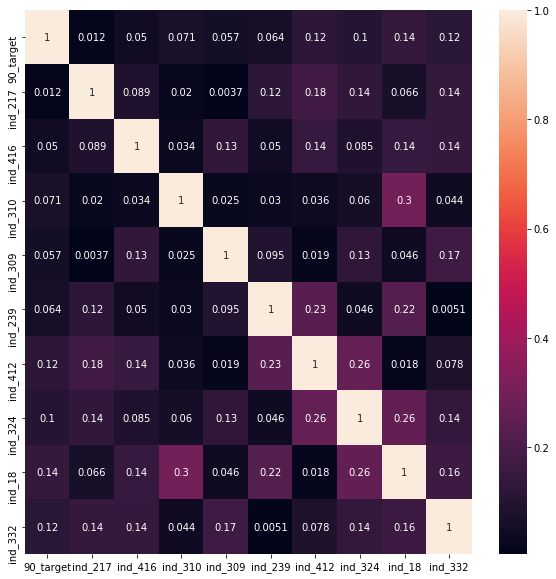

In [58]:
f,ax = plt.subplots(figsize=(10,10))
import seaborn as sns
sns.heatmap(df_last.corr().abs(), annot=True);

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              38.56
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    1.01e-66
Time:                        17:59:55   Log-Likelihood:                         -6398.0
No. Observations:                4625   AIC:                                  1.281e+04
Df Residuals:                    4616   BIC:                                  1.287e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_217        0.0477      0.015      3.151      0.002       0.018       0.077
ind_416        0.1078      0.015      7.157      0.000       0.078       0.137
ind_310        0.0416      0.015      2.694      0.007       0.011       0.072
ind_309        0.0328      0.015      2.170      0.030       0.003       0.063
ind_239        0.0659      0.016      4.220      0.000       0.035       0.096
ind_412        0.1551      0.016      9.834      0.000       0.124       0.186
ind_324       -0.0328      0.016     -2.078      0.038      -0.064      -0.002
ind_18         0.1102      0.017      6.640      0.000       0.078       0.143
ind_332        0.1124      0.015      7.481      0.000       0.083       0.142
==============================================================================
Omnibus:                    20678.622   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.577
Skew:                           0.162   Prob(JB):                    2.08e-124
Kurtosis:                       1.312   Cond. No.                         2.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
from sklearn.decomposition import PCA
pca = PCA()

In [61]:
X_reduced_train = pca.fit_transform(scale(X_train))
# scale edilmiş X_train setime pca modelini fit ediyorum.

In [62]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:15]

# kümülatif acıklanan varyans oranı 
# dikkatle bakarsan değişken sayısı arttıça açıklanabilecek kısım oranı da artmış oluyor.
# burda bak nerde grafik düzlemeye başlıyor sonra ona göre component sayısı seç
# burda graifik de çizdirebilirsin

array([ 19.08,  34.57,  47.81,  59.94,  70.4 ,  80.59,  88.56,  95.26,
       100.  ])

Text(0, 0.5, 'variance %')

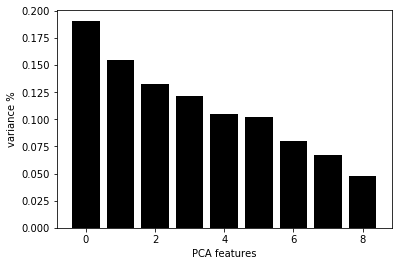

In [63]:
import matplotlib.pyplot as plt
features =range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_, color="black")
plt.xlabel("PCA features")
plt.ylabel("variance %")

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [29]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [30]:
pcr_model.intercept_
# B0 sabitini gördük

0.0008202252652037081

In [31]:
pcr_model.coef_
# bütün değişkenlerin katsayısı gelmiş oldu

array([ 0.09844493,  0.06425664,  0.00061678, -0.09734651, -0.06559409,
       -0.03220648,  0.08483311,  0.19832893, -0.00826837,  0.00968209])

## Tahmin

In [32]:
y_pred = pcr_model.predict(X_reduced_train)
# pcr_modelin altında pca modeli fit edilmiş olan X_reduced_train kullanarak tahmin ediyoruz.
y_pred[0:5]
# tahmin edilmiş  değerlerimizin ilk 5 tanesine bakıyoruz.

array([-0.03263883, -0.22052531, -0.21863693, -0.18853091,  0.38930831])

In [33]:
np.sqrt(mean_squared_error(y_train, y_pred))
# pcr_modelinin ilkel rmse değerini hesapladım 


0.9639319735448773

In [34]:
r2_score(y_train, y_pred)
# train seri için PCA uygulanmış ilkel değer

0.07208029808956284

In [35]:
pca2 = PCA()
# test verisi için uygulamaya başlıyoruz

In [36]:
X_reduced_test = pca2.fit_transform(scale(X_test))
# scale edilmiş test verisine pca fit ediyorum,

In [37]:
y_pred = pcr_model.predict(X_reduced_test)
# tahmin edilen değerler

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))
# test verisi için ilkel rmse değerimiz bu oldu 


0.9912503492295619

## Model Tuning 

    - Şu ana kadar değişken sayısına hiç dokunmadık bunu optimize etmemiz gerekiyor.

In [39]:
from sklearn import model_selection

In [40]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
# 10 katlı KFold cross-validation, shuffle verilerin karıştırılıp karıştırılmayacağı anlamına gelir

In [41]:
lm = LinearRegression()

In [42]:
RMSE = []
# rmse değerlerini içine atamak için boş olab bir liste açtım

In [43]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
    
# burda manuel bir döngü yazman gerekiyor
#y_train.ravel() bu bileşen ne işe yarıyor.

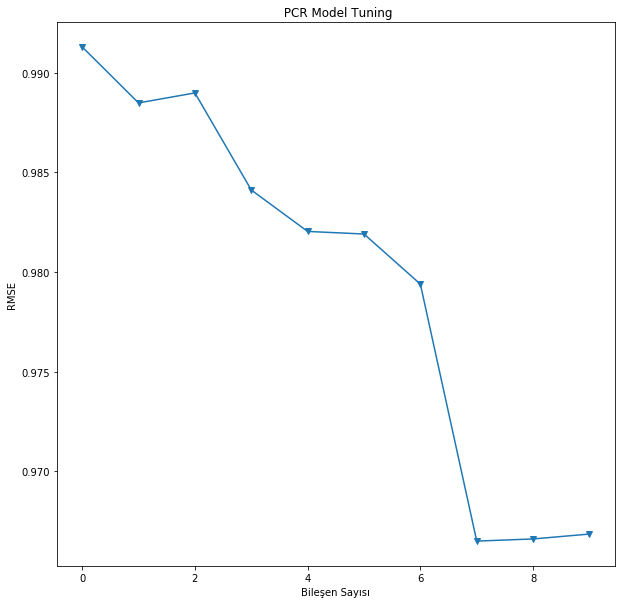

In [53]:
plt.figure(figsize=(10,10))
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title(' PCR Model Tuning');

# burda grafik olayı çok güzrl çözdü
#optimum bileşen sayısını train seti ile cross-validation yöntemi kullanarak ideal bileşen sayısının 6 olduğunu gördük
# iş bitmedi bu 6 bileşen ile final modelini kurman gerek

In [45]:
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
# 10 değeri seçtim

In [46]:
y_pred = pcr_model.predict(X_reduced_train[:,0:10])
# tahmin ettlim

In [47]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))
# train seti için 10 değer ile  rmse

0.9639319735448773


In [48]:
r2_score(y_train, y_pred)

0.07208029808956284

In [49]:
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
# 10 değer seçilerek test değerlerini tahmini

In [50]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
# test verisinin rmse değeri

0.9912503492295619


In [51]:
r2_score(y_test, y_pred)

0.01344415257576026

# PLS (Partial least squares regression-PLSR)

In [52]:
y = df_last["90_target"]
X = df_last.drop(["90_target"], axis = 1).astype("float64")

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [384]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [385]:
pls_model = PLSRegression().fit(X_train, y_train)
# modeli kurduk

In [386]:
pls_model.coef_
# model katsayıları

array([[ 0.03542638],
       [ 0.1053578 ],
       [ 0.06251876],
       [ 0.04836007],
       [ 0.05788157],
       [ 0.13433083],
       [-0.0509705 ],
       [-0.05186976],
       [ 0.11106807],
       [ 0.1127215 ]])

In [387]:
pls_model_10 = PLSRegression(n_components=10).fit(X_train, y_train)
pls_model_10.coef_
# burda 10 bileşenli bir model kurup katsayılarını aldık fakat 19 tane katsayı yazdı???
# sana veri gönderecek kişi değişken eksilttiğinde kafası karışabilir burda olay çok farklı

array([[ 0.04536591],
       [ 0.10245615],
       [ 0.04079906],
       [ 0.03889273],
       [ 0.06539706],
       [ 0.15213653],
       [-0.05683595],
       [-0.06386231],
       [ 0.11285038],
       [ 0.11021588]])

# PLS- Tahmin

In [388]:
pls_model.predict(X_train)[0:10]
# tahmin edilen değerleirn ilk 10 tanesi

array([[ 0.01121814],
       [-0.21858699],
       [-0.17768599],
       [-0.23826957],
       [ 0.39942029],
       [-0.16041047],
       [ 0.27283731],
       [-0.26816303],
       [-0.2232901 ],
       [ 0.50187331]])

In [389]:
y_pred = pls_model.predict(X_train)

In [390]:
np.sqrt(mean_squared_error(y_train, y_pred))
# train seti için rmse geldi

0.9644961978138753

In [391]:
r2_score(y_train, y_pred)
# train seti için r^2 değeri

0.07099369020090895

In [392]:
y_pred = pls_model.predict(X_test)
# test seti için tahminleri yap

In [393]:
np.sqrt(mean_squared_error(y_test, y_pred))
# test seti için rmse değeri
# bundan sonra modelini tune etme işlemine geçiyorsun!!

0.9843298614833362

In [394]:
r2_score(y_test, y_pred)

0.027171490967251133

## PLS -Model Tuning

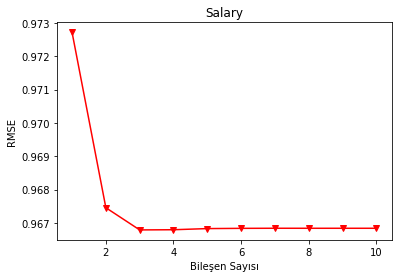

In [395]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1) # 10 katlı cross-val


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

# bileşen sayısı 3 olunca rmse en düşük değer oldu yani 3 bileşen olması gerekiyr

In [396]:
# iki bileşenli final model
pls_model = PLSRegression(n_components = 3).fit(X_train, y_train)

In [397]:
y_pred = pls_model.predict(X_test)

In [398]:
np.sqrt(mean_squared_error(y_test, y_pred))
# final modeli test veri seti rmse aldık modeli tune ettin.
# pls modelinde ulaşabileceğin en optimum hata miktarı 

0.982518818437282

In [399]:
r2_score(y_test, y_pred)

0.030747961820132064

## Ridge Regresyon - Model

In [400]:
y = df_last["90_target"]
X = df_last.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [401]:
from sklearn.linear_model import Ridge

In [402]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [403]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [404]:
ridge_model.coef_
# katsaylar

array([ 0.04597846,  0.10420048,  0.04116785,  0.0394062 ,  0.06575863,
        0.15373032, -0.05647374, -0.06317757,  0.1122024 ,  0.11077172])

In [405]:
10**np.linspace(10,-2,100)*0.5 
# döngüye girecek lambda değerleri

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

## Ridge Regresyon -Tahmin

In [406]:
y_pred = ridge_model.predict(X_test)
# X test setine ridge modele verip tahminleri aldık

In [407]:
np.sqrt(mean_squared_error(y_test, y_pred))
# ridge modele göre test hatasının rmse değerini aldık.

0.9820659067149724

In [408]:
r2_score(y_test, y_pred)
# buda ridge modeline göre r^2 değerlerini aldık

0.03164134812912667

## Ridge Regresyon- Model Tuning

In [409]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 
# döngüye soktuğum lamda değerleri

In [410]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [411]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)
# burda Ridge Cross_val çağırdık. Normalizasyon işlemi de yapmış olduk.
# burda bütün lamdaları denedi ve bize optimum olanı verecek aşağıya bak

In [412]:
ridge_cv.fit(X_train, y_train)
# cros-val modelini eğitim setine fit ediyoruz

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [413]:
ridge_cv.alpha_
# optimum lamda değerini aldın artık final modelini kur

0.03527401155359316

In [414]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [415]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))
# optimum lamnda değerini kullanarak modelin tune edilmiş halinden rmse değerini aldık

0.9814217584028158

In [416]:
r2_score(y_test, ridge_tuned.predict(X_test))

0.03291124665439682

## Lasso Regresyon -Model

In [76]:
y = df_last["90_target"]
X = df_last.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [77]:
from sklearn.linear_model import Lasso
# lasso import ettik

In [78]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
# yine bir alpha alarak fit ettik

In [79]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
lasso_model.coef_
# lambda 0.1 olarak katsayıları çektik.

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03116447, -0.        ,  0.03794454,  0.02412047])

In [81]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar
# döngüye girecek olan lambda değerleri

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

## Lasso Regresyon- Tahmin 

In [82]:
lasso_model.predict(X_test)
# lasso modeli ile test verisi tahmin çıktıları

array([-0.04863568,  0.12644799, -0.00324829, ..., -0.03217658,
       -0.06034819,  0.06318033])

In [83]:
y_pred = lasso_model.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.9897023998485569

In [85]:
r2_score(y_test,y_pred)
# test verisi ile rmse değerini aldık. şimdi modeli tune etmen gerek bu tune edilmemiş rmse

0.016522983498532873

## Lasso Regresyon -  Model Tuning

In [86]:
from sklearn.linear_model import LassoCV
# lasso için cross-val fonk çağırdık

In [87]:
lasso_cv_model = LassoCV(alphas = None,
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

# burda lambda girmemiş çünkü bazı durumlarda ön tanımlılara bırakmak gerek bu şekilde algoritmanın ön tanımlı değeri üzeriden seçtirdik

In [88]:
lasso_cv_model.fit(X_train,y_train)
# lasso_cross_val fonksiyonunu eğitim setimize fit ettik

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [89]:
lasso_cv_model.alpha_
# optimal olan lambda değerini seçti

8.355821969209535e-06

In [90]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
# optimal lambda değerini lasso regresyonu içine alarak tune edecek modeli kurduk

In [91]:
lasso_tuned.fit(X_train, y_train)
# Tune etme modelini Train setine fit ettik

Lasso(alpha=8.355821969209535e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
y_pred = lasso_tuned.predict(X_test)
# X_testi tune edilmiş modele verdik ve tahmin edilcek değerleri aldık

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))
# burda tune edilmiş modelimiz için test seti üzerinden rmse değerimize baktık
# ridge ile olan rmse farkına bakabilrisin 

0.9834367146411379

In [94]:
r2_score(y_test,y_pred)

0.02893611185216871

# ElasticNet Regresyonu

In [96]:
y = df_last["90_target"]
X = df_last.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [97]:
from sklearn.linear_model import ElasticNet
# ElastikNet import ettik

In [98]:
enet_model = ElasticNet().fit(X_train, y_train)
# modeli train setine fit ettik

In [99]:
enet_model.coef_
# modelden çıkan katsayıları çektik

array([-0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.])

In [100]:
enet_model.intercept_
# modelden B0 değerini çekmiş olduk

0.0008202252652037078

## ElasticNet Regresyonu- Tahmin

In [101]:
enet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
enet_model.predict(X_test)
# modele test seti verip tahminleri çektik

array([0.00082023, 0.00082023, 0.00082023, ..., 0.00082023, 0.00082023,
       0.00082023])

In [103]:
y_pred = enet_model.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(y_test, y_pred))
# test seti için rmse değerini aldık

0.9979869490771288

In [105]:
r2_score(y_test, y_pred)
# test seti için r^2 değerini aldık

-1.0804393751007169e-05

In [106]:
## Model Tuning

In [107]:
from sklearn.linear_model import ElasticNetCV
# ElastikNet için Cross-Val Fonk çağırdık

In [108]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)
# 10 katlı cross-val train setine fit ettik

In [109]:
enet_cv_model.alpha_
# burdan optimal alpha değerini çektik

0.0018626911536600676

In [110]:
enet_cv_model

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [111]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)
# optimal alpha değerini final modeli için kullandık

In [112]:
y_pred = enet_tuned.predict(X_test)
#  test verileri le tahminleri çektik

In [113]:
np.sqrt(mean_squared_error(y_test, y_pred))
# test verileri tune edilmiş modelin  rmse değerini aldık

0.9832054738393824

In [114]:
r2_score(y_test, y_pred)
# test verileri tune edilmiş model için r^2 değerini aldık

0.029392721187426418